<h2><center>Final Project: Where it Pays to Attend College</center></h2>

<h3><center>By Ansh Vanam and Rishi Mullangi<center></h3>

<h2>Introduction</h2>

For our final project, we have decided to work with a dataset that contains salaries of various colleges based on major, type of school (private, public), and region. The dataset we chose has three separate CSV files, "salaries-by-college-type.csv", "salaries-by-region.csv", and "degrees-that-pay-back.csv". These CSV files contain data from graduating up to their mid-career, including percentiles ranging from 10-90. 

Using these CSV files, we plan to look into how these variables affect the salaries of students, and how these factors can affect choices of students looking to go into college. Our first step is to download the CSV files from this Kaggle dataset, created by the Wall Street Journal:

https://www.kaggle.com/datasets/wsj/college-salaries/code?resource=download&select=salaries-by-college-type.csv

From here, we can download the three CSV files and import them into our code editor. Then, we use pandas to create dataframes out of the CSV files. 

Note: Ensure you have the following python libraries installed on your system and the CSV files downloaded to run the tutorial.

Pandas documentation - https://pandas.pydata.org/docs/ 

Seaborn documentation - https://seaborn.pydata.org

Numpy documentation - https://numpy.org/doc/ 

Matplotlib documentation - https://matplotlib.org/stable/index.html 

In [25]:
import pandas as pd
import numpy as np
import statsmodels.api as stm
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

The first table we're looking at is salaries-by-college-type, which details the names of various colleges as well as their School Type. In the next python block we will work on cleaning the data and making it more useable. First, we need to change the values to floats so that we can do operations on them. Then, we change the names of the columns to be more clear and correspond well with the other dataframes we will initialize.

In [26]:
df_by_colleges = pd.read_csv('salaries-by-college-type.csv')
#Getting rid of all of the NaN values and replacing them with 0 to make calculations doable.
#df1 = df1.fillna(0)

#Should we include the dataframe before cleaning it up as well, or just the cleaned up version? 

#Getting rid of $ signs as well as commas so that we can convert values to floats. 
for (columnName, columnData) in df_by_colleges.iteritems():
    df_by_colleges[columnName] = df_by_colleges[columnName].str.replace('$','')
    df_by_colleges[columnName] = df_by_colleges[columnName].str.replace(',', '')
df_by_colleges = df_by_colleges.astype({'Starting Median Salary':'float', 
'Mid-Career Median Salary': 'float', 'Mid-Career 10th Percentile Salary': 'float', 
'Mid-Career 25th Percentile Salary':'float', 'Mid-Career 75th Percentile Salary':'float', 
'Mid-Career 90th Percentile Salary':'float'})

print(df_by_colleges.dtypes)

#Rename columns to be more concise but still descriptive 
df_by_colleges = df_by_colleges.rename(columns = {'School Name':'School Name',
'School Type':'School Type','Starting Median Salary':'Starting Median', 
'Mid-Career Median Salary':'Mid-Career Median', 
'Mid-Career 10th Percentile Salary':'Mid-Career 10%',
'Mid-Career 25th Percentile Salary':'Mid-Career 25%', 
'Mid-Career 75th Percentile Salary':'Mid-Career 75%', 
'Mid-Career 90th Percentile Salary':'Mid-Career 90%'})
df_by_colleges.head()

School Name                           object
School Type                           object
Starting Median Salary               float64
Mid-Career Median Salary             float64
Mid-Career 10th Percentile Salary    float64
Mid-Career 25th Percentile Salary    float64
Mid-Career 75th Percentile Salary    float64
Mid-Career 90th Percentile Salary    float64
dtype: object


C:\Users\RishiMain\AppData\Local\Temp\ipykernel_22104\2603699041.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_by_colleges[columnName] = df_by_colleges[columnName].str.replace('$','')


,School Name,School Type,Starting Median,Mid-Career Median,Mid-Career 10%,Mid-Career 25%,Mid-Career 75%,Mid-Career 90%
0,Massachusetts Institute of Technology (MIT),Engineering,72200.0,126000.0,76800.0,99200.0,168000.0,220000.0
1,California Institute of Technology (CIT),Engineering,75500.0,123000.0,NaN,104000.0,161000.0,NaN
2,Harvey Mudd College,Engineering,71800.0,122000.0,NaN,96000.0,180000.0,NaN
3,Polytechnic University of New York Brooklyn,Engineering,62400.0,114000.0,66800.0,94300.0,143000.0,190000.0
4,Cooper Union,Engineering,62200.0,114000.0,NaN,80200.0,142000.0,NaN


Now that we've cleaned up our first table by converting the values that are numerical to floats, we can move on to the next table, 'degrees-that-pay-back.csv', which details undergraduate major's median starting salary in relation to their undergraduate major, mid-career median salary, and other useful information that we can use later on in the tutorial. We will stick to the same column renaming conventions so that the column names remain aligned across the different dataframes

In [27]:
df_by_major = pd.read_csv('degrees-that-pay-back.csv')

#Getting rid of all of the NaN values and replacing them with 0 to make calculations doable.
#df_by_major = df_by_major.fillna(0)

#Changing all of the columns to floats (Where required)
for (columnName, columnData) in df_by_major.iteritems():
    if(columnName == 'Percent change from Starting to Mid-Career Salary'): continue
    df_by_major[columnName] = df_by_major[columnName].str.replace('$','')
    df_by_major[columnName] = df_by_major[columnName].str.replace(',', '')
df_by_major = df_by_major.astype({'Starting Median Salary':'float', 
'Mid-Career Median Salary': 'float', 'Mid-Career 10th Percentile Salary': 'float', 
'Mid-Career 25th Percentile Salary':'float', 'Mid-Career 75th Percentile Salary':'float', 
'Mid-Career 90th Percentile Salary':'float'})

print(df_by_major.dtypes)

#Rename columns to be more concise but still descriptive 
df_by_major = df_by_major.rename(columns = {'Undergraduate Major':'Major',
'Starting Median Salary':'Starting Median', 
'Mid-Career Median Salary':'Mid-Career Median', 
'Percent change from Starting to Mid-Career Salary': 'Start to Mid % Change',
'Mid-Career 10th Percentile Salary':'Mid-Career 10%',
'Mid-Career 25th Percentile Salary':'Mid-Career 25%', 
'Mid-Career 75th Percentile Salary':'Mid-Career 75%', 
'Mid-Career 90th Percentile Salary':'Mid-Career 90%'})
df_by_major.head()

C:\Users\RishiMain\AppData\Local\Temp\ipykernel_22104\1207613615.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_by_major[columnName] = df_by_major[columnName].str.replace('$','')


Undergraduate Major                                   object
Starting Median Salary                               float64
Mid-Career Median Salary                             float64
Percent change from Starting to Mid-Career Salary    float64
Mid-Career 10th Percentile Salary                    float64
Mid-Career 25th Percentile Salary                    float64
Mid-Career 75th Percentile Salary                    float64
Mid-Career 90th Percentile Salary                    float64
dtype: object


,Major,Starting Median,Mid-Career Median,Start to Mid % Change,Mid-Career 10%,Mid-Career 25%,Mid-Career 75%,Mid-Career 90%
0,Accounting,46000.0,77100.0,67.6,42200.0,56100.0,108000.0,152000.0
1,Aerospace Engineering,57700.0,101000.0,75.0,64300.0,82100.0,127000.0,161000.0
2,Agriculture,42600.0,71900.0,68.8,36300.0,52100.0,96300.0,150000.0
3,Anthropology,36800.0,61500.0,67.1,33800.0,45500.0,89300.0,138000.0
4,Architecture,41600.0,76800.0,84.6,50600.0,62200.0,97000.0,136000.0


Finally, we can look at the last CSV file, 'salaries-by-region.csv', which details college graduate salaries by region and college. We will perform the same operations on this dataframe, namely, converting values to floats as appropriate, and renaming columns for compatibility across the dataframes.

In [28]:
df_by_region = pd.read_csv('salaries-by-region.csv')
#Getting rid of all of the NaN values and replacing them with 0 to make calculations doable.
#df_by_region = df_by_region.fillna(0)

#Converting numerical columns to float values.
for (columnName, columnData) in df_by_region.iteritems():
    if(columnName == 'Percent change from Starting to Mid-Career Salary'): continue
    df_by_region[columnName] = df_by_region[columnName].str.replace('$','')
    df_by_region[columnName] = df_by_region[columnName].str.replace(',', '')
df_by_region = df_by_region.astype({'Starting Median Salary':'float', 
'Mid-Career Median Salary': 'float', 'Mid-Career 10th Percentile Salary': 'float', 
'Mid-Career 25th Percentile Salary':'float', 'Mid-Career 75th Percentile Salary':'float', 
'Mid-Career 90th Percentile Salary':'float'})

print(df_by_region.dtypes)

#Rename columns to be more concise but still descriptive 
df_by_region = df_by_region.rename(columns = {'School Name':'School Name',
'Starting Median Salary':'Starting Median', 
'Mid-Career Median Salary':'Mid-Career Median', 
'Mid-Career 10th Percentile Salary':'Mid-Career 10%',
'Mid-Career 25th Percentile Salary':'Mid-Career 25%', 
'Mid-Career 75th Percentile Salary':'Mid-Career 75%', 
'Mid-Career 90th Percentile Salary':'Mid-Career 90%'})
df_by_region.head()

School Name                           object
Region                                object
Starting Median Salary               float64
Mid-Career Median Salary             float64
Mid-Career 10th Percentile Salary    float64
Mid-Career 25th Percentile Salary    float64
Mid-Career 75th Percentile Salary    float64
Mid-Career 90th Percentile Salary    float64
dtype: object


C:\Users\RishiMain\AppData\Local\Temp\ipykernel_22104\3106817859.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_by_region[columnName] = df_by_region[columnName].str.replace('$','')


,School Name,Region,Starting Median,Mid-Career Median,Mid-Career 10%,Mid-Career 25%,Mid-Career 75%,Mid-Career 90%
0,Stanford University,California,70400.0,129000.0,68400.0,93100.0,184000.0,257000.0
1,California Institute of Technology (CIT),California,75500.0,123000.0,NaN,104000.0,161000.0,NaN
2,Harvey Mudd College,California,71800.0,122000.0,NaN,96000.0,180000.0,NaN
3,University of California Berkeley,California,59900.0,112000.0,59500.0,81000.0,149000.0,201000.0
4,Occidental College,California,51900.0,105000.0,NaN,54800.0,157000.0,NaN


<h2>Data Management/Representation</h2>
Next, we will represent various data from the dataframes to try and understand the tables more, and focus our tutorial. These graphs will provide a visual understanding of what all the dataframes represent.

First, we want to understand the relationship between region and starting median salary, to see if the region has a heavy effect on new graduates' salaries. To do this, we can create a simple bar graph that will display the median salary ranges of the various regions. 

[]

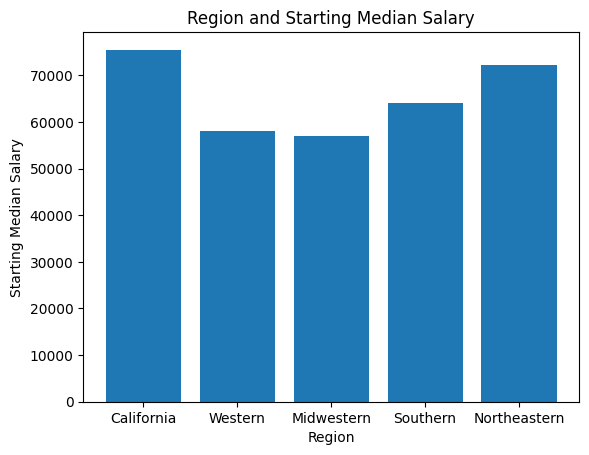

In [29]:
#plt.figure(figsize = (10,7))
plt.title('Region and Starting Median Salary')
plt.xlabel('Region')
plt.ylabel('Starting Median Salary')
plt.bar(df_by_region['Region'], df_by_region['Starting Median'])
plt.plot()

Here, we see that California universities have the highest starting median salary, followed closely by colleges in the Northeast. 

It is likely that a high percentage of students decide to live within the same region/state where they went to school. Since California and the Northeast are more expensive to live in than the other three regions, it makes sense that the starting median salary for students attending universities in either of the two regions is also higher. 

California and the Northeast might also have a higher percentage of prestigious schools than the other regions

Now we will replicate the Median Salary vs Region graph, except for Mid Career instead of Starting

[]

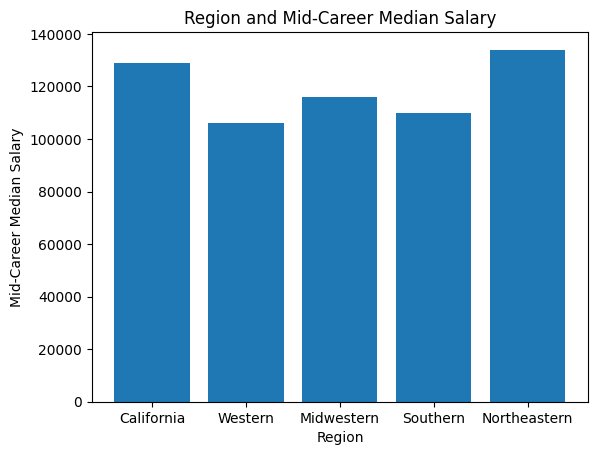

In [30]:
#plt.figure(figsize = (10,7))
plt.title('Region and Mid-Career Median Salary')
plt.xlabel('Region')
plt.ylabel('Mid-Career Median Salary')
plt.bar(df_by_region['Region'], df_by_region['Mid-Career Median'])
plt.plot()

Here we see that although California universities have the highest starting median salary, Northeastern universities have the highest mid career median salary. 

School Type vs. Starting Median

[]

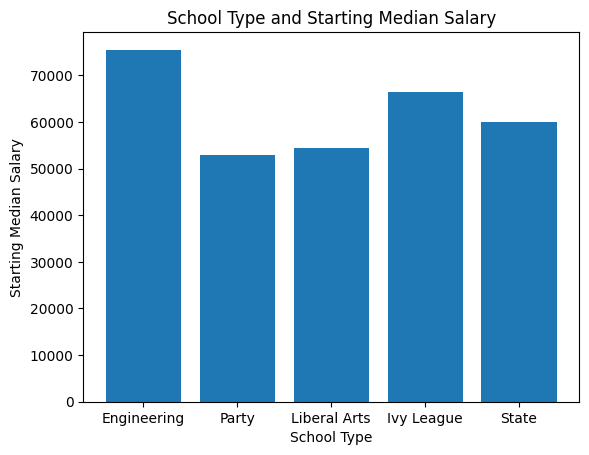

In [31]:
#plt.figure(figsize = (10,7))
plt.title('School Type and Starting Median Salary')
plt.xlabel('School Type')
plt.ylabel('Starting Median Salary')
plt.bar(df_by_colleges['School Type'], df_by_colleges['Starting Median'])
plt.plot()

School Type vs. Mid-Career Median

[]

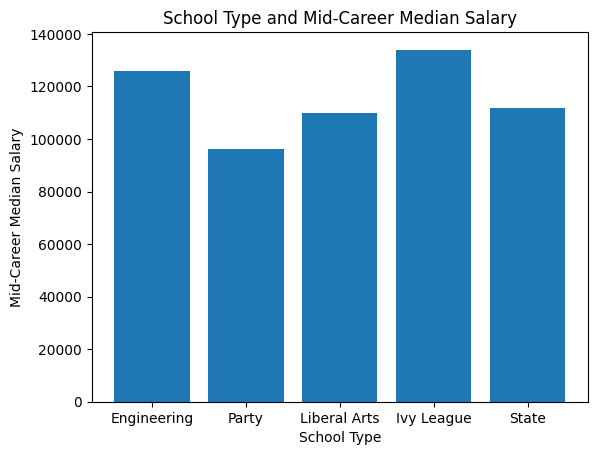

In [32]:
#plt.figure(figsize = (10,7))
plt.title('School Type and Mid-Career Median Salary')
plt.xlabel('School Type')
plt.ylabel('Mid-Career Median Salary')
plt.bar(df_by_colleges['School Type'], df_by_colleges['Mid-Career Median'])
plt.plot()

We notice that the starting median salary from Engineering schools is higher than that of Ivy League, but the mid career median salary of Engineering schools is lower than that of Ivy League. This is a trend similar to what we noticed in California-Northeastern school salaries.

Major vs Salary analysis

In [33]:
#Initial analysis on major - salary.
    #Theres a lot of majors so I couldnt think of a way to graph this
    #For now I just made two lists sorted in descending order of start and mid salary respectively

#Start
starting_order = df_by_major.sort_values(by = 'Starting Median', ascending = False)['Major'].reset_index(drop = True)
starting_order

0                      Physician Assistant
1                     Chemical Engineering
2                     Computer Engineering
3                   Electrical Engineering
4                   Mechanical Engineering
5                    Aerospace Engineering
6                   Industrial Engineering
7                         Computer Science
8                                  Nursing
9                        Civil Engineering
10                            Construction
11                                 Physics
12                               Economics
13    Management Information Systems (MIS)
14             Information Technology (IT)
15                                 Finance
16                              Accounting
17                                    Math
18                                 Geology
19                     Business Management
20                             Agriculture
21                               Chemistry
22                            Architecture
23         

In [34]:
#Create Scatterplot

For our final data representation, we wanted to showcase the changes in salaries as time goes on using a boxplot, as this would show outliers, median, and the varying quartiles as well. 

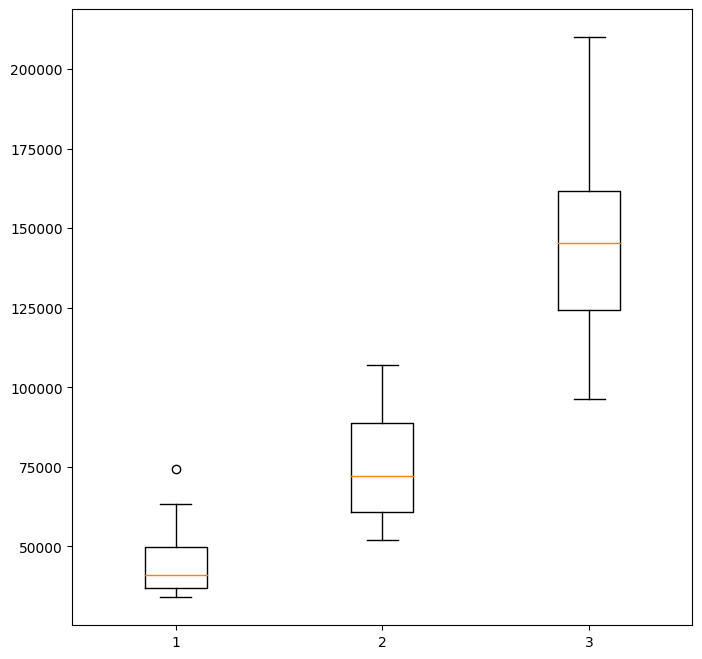

In [38]:
plt.figure(figsize=(8,8))
lst = [df_by_major['Starting Median'], df_by_major['Mid-Career Median'], df_by_major['Mid-Career 90%']]
plt.boxplot(lst)
plt.show()

<h2>